### We import the libraries we are going to use.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Transform datasets into dataframes
calendar = pd.read_csv('./datasets/New_calendar.csv')
listings = pd.read_csv('./datasets/New_listings.csv')
reviews = pd.read_csv('./datasets/New_reviews.csv')

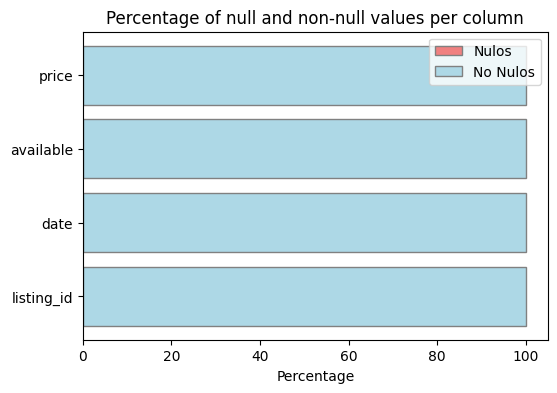

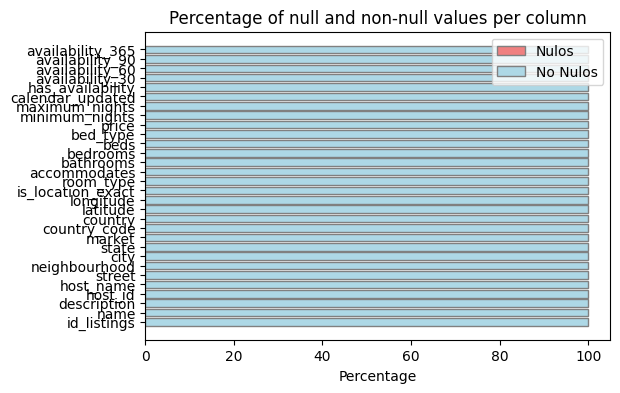

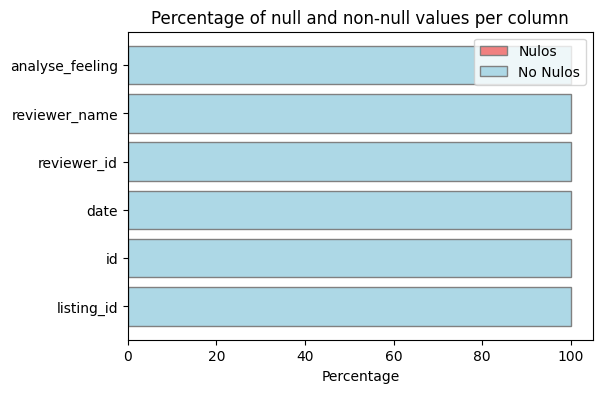

In [7]:
def plot_null_values(df):
    # We count null and non-null values per column
    null_counts = df.isnull().sum()
    non_null_counts = df.notnull().sum()

    # We will calculate the percentages
    total_counts = null_counts + non_null_counts
    null_percentage = (null_counts / total_counts) * 100
    non_null_percentage = (non_null_counts / total_counts) * 100

    # We will set the size of the graph
    fig, ax = plt.subplots(figsize=(6, 4))

    # We will create the stacked bars
    bars1 = ax.barh(df.columns, null_percentage, color='lightcoral', edgecolor='grey', label='Nulls')
    bars2 = ax.barh(df.columns, non_null_percentage, left=null_percentage, color='lightblue', edgecolor='grey', label='No Nulos')

    # We add tags and title
    ax.set_xlabel('Percentage')
    ax.set_title(f'Percentage of null and non-null values per column')
    ax.legend()

    # We will show the graph
    plt.show()
     

# We use the function to display the graphs.
plot_null_values(calendar)
plot_null_values(listings)
plot_null_values(reviews)
     


In [9]:
# We make sure the 'date' column is in datetime format
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')

# We extract the year and create a new column 'year'.
calendar['year'] = calendar['date'].dt.year

In [10]:
calendar.head()

,listing_id,date,available,price,year
0,50778,2020-04-26,unavailable,"$2,655.00",2020
1,133654,2020-04-27,available,"$1,150.00",2020
2,133654,2020-04-28,available,"$1,150.00",2020
3,133654,2020-04-29,available,"$1,150.00",2020
4,133654,2020-04-30,available,"$1,150.00",2020


In [11]:
# We convert the 'price' column to numeric format
calendar['price'] = calendar['price'].replace('[$,]', '', regex=True).astype(float)

# We group by 'year' and calculate average price
price_by_year = calendar.groupby('year')['price'].mean().reset_index()

### Let's graph the table

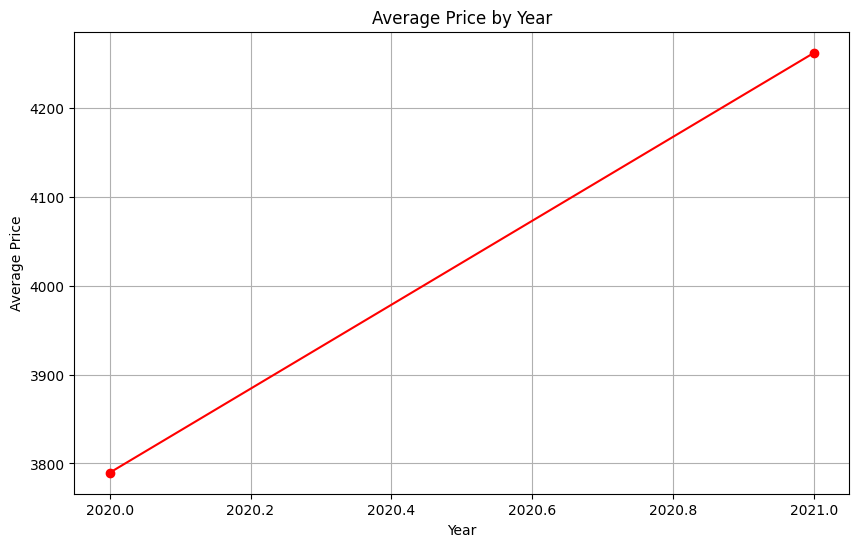

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(price_by_year['year'], price_by_year['price'], marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price by Year')
plt.grid(True)
plt.show()